In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
# from sklearn.model_selection import train_test_split

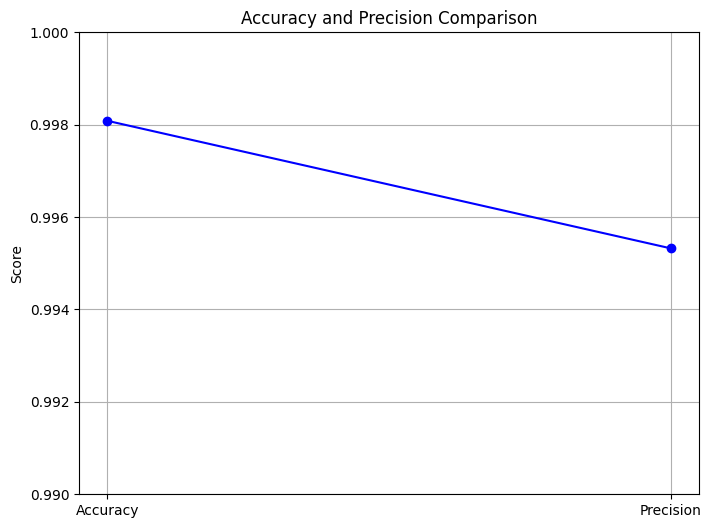

In [3]:
import matplotlib.pyplot as plt

# Define evaluation metrics
metrics = ['Accuracy', 'Precision']
values = [0.9980847350047604, 0.9953224942940065]

# Plotting the comparison graph
plt.figure(figsize=(8, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Accuracy and Precision Comparison')
plt.ylabel('Score')
plt.ylim(0.99, 1)
plt.grid(True)
plt.show()


In [2]:
df1 = pd.read_csv('D:/pl/Zero-shield-main/Zero-shield-main/dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')  
df2 = pd.read_csv('D:/pl/Zero-shield-main/Zero-shield-main/dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df3 = pd.read_csv('D:/pl/Zero-shield-main/Zero-shield-main/dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df4 = pd.read_csv('D:/pl/Zero-shield-main/Zero-shield-main/dataset/Monday-WorkingHours.pcap_ISCX.csv')
df5 = pd.read_csv('D:/pl/Zero-shield-main/Zero-shield-main/dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df6 = pd.read_csv('D:/pl/Zero-shield-main/Zero-shield-main/dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df7 = pd.read_csv('D:/pl/Zero-shield-main/Zero-shield-main/dataset/Tuesday-WorkingHours.pcap_ISCX.csv')
df8 = pd.read_csv('D:/pl/Zero-shield-main/Zero-shield-main/dataset/Wednesday-workingHours.pcap_ISCX.csv')

In [3]:
df = pd.concat([df1,df2])
# del df1,df2
df = pd.concat([df,df3])
# del df3
df = pd.concat([df,df4])
# del df4
df = pd.concat([df,df5])
# del df5/
df = pd.concat([df,df6])
# del df6
df = pd.concat([df,df7])
# del df7
df = pd.concat([df,df8])
# del df8
df.shape

(2830743, 79)

In [4]:
print(df.shape)
df =  df.drop_duplicates(keep="first")
print(df.shape)

(2830743, 79)
(2522362, 79)


In [5]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df.shape

C:\Users\black\AppData\Local\Temp\ipykernel_7224\789146936.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


(2520798, 79)

In [6]:
colsfromindex = [' Subflow Bwd Bytes',' ECE Flag Count',' Fwd URG Flags',' Active Max','Init_Win_bytes_forward',' act_data_pkt_fwd',' Bwd Header Length',' min_seg_size_forward',' Fwd Header Length']

In [7]:
print(df.shape)
df.drop(colsfromindex, axis=1, inplace=True)
print(df.shape)

(2520798, 79)
(2520798, 70)


SPLITTING

In [8]:
df[" Label"].value_counts()

BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [9]:
dos_hulk = df[df[' Label'] == 'DoS Hulk']
ddos = df[df[' Label'] == 'DDoS']
dos_goldeneye = df[df[' Label'] == 'DoS GoldenEye']
ftp_patator = df[df[' Label'] == 'FTP-Patator']
dos_slowloris = df[df[' Label'] == 'DoS slowloris']
dos_slowhttptest = df[df[' Label'] == 'DoS Slowhttptest']
ssh_patator = df[df[' Label'] == 'SSH-Patator']
bot = df[df[' Label'] == 'Bot']
webattack_bruteforce = df[df[' Label'] == 'Web Attack � Brute Force']
webattack_xss = df[df[' Label'] == 'Web Attack � XSS']
infiltration = df[df[' Label'] == 'Infiltration']
webattack_sqlinjection = df[df[' Label'] == 'Web Attack � Sql Injection']
heartbleed = df[df[' Label'] == 'Heartbleed']

In [10]:
dos_hulk = dos_hulk.iloc[:, :-1]
print("dos_hulk:",dos_hulk.shape)
ddos = ddos.iloc[:, :-1]
print("ddos:",ddos.shape)
dos_goldeneye = dos_goldeneye.iloc[:, :-1]
print('dos_goldeneye:',dos_goldeneye.shape)
ftp_patator = ftp_patator.iloc[:, :-1]
print('ftp_patator:',ftp_patator.shape)
dos_slowloris = dos_slowloris.iloc[:, :-1]
print('dos_slowloris:',dos_slowloris.shape)
dos_slowhttptest = dos_slowhttptest.iloc[:, :-1]
print('dos_slowhttptest',dos_slowhttptest.shape)
ssh_patator = ssh_patator.iloc[:, :-1]
print('ssh_patator:',ssh_patator.shape)
bot = bot.iloc[:, :-1]
print('bot:',bot.shape)
webattack_bruteforce = webattack_bruteforce.iloc[:, :-1]
print('webattack_bruteforce:',webattack_bruteforce.shape)
webattack_xss = webattack_xss.iloc[:, :-1]
print('webattack_xss:',webattack_xss.shape)
infiltration = infiltration.iloc[:, :-1]
print('infiltration:',infiltration.shape)
webattack_sqlinjection = webattack_sqlinjection.iloc[:, :-1]
print('webattack_sqlinjection:',webattack_sqlinjection.shape)
heartbleed = heartbleed.iloc[:, :-1]
print("heartbleed:",heartbleed.shape)

dos_hulk: (172846, 69)
ddos: (128014, 69)
dos_goldeneye: (10286, 69)
ftp_patator: (5931, 69)
dos_slowloris: (5385, 69)
dos_slowhttptest (5228, 69)
ssh_patator: (3219, 69)
bot: (1948, 69)
webattack_bruteforce: (1470, 69)
webattack_xss: (652, 69)
infiltration: (36, 69)
webattack_sqlinjection: (21, 69)
heartbleed: (11, 69)


In [11]:
classes = [dos_hulk, ddos, dos_goldeneye, ftp_patator, dos_slowloris, dos_slowhttptest, ssh_patator, bot, webattack_bruteforce, webattack_xss, infiltration, webattack_sqlinjection, heartbleed]

Creating models


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

# DOS_HULK


In [13]:
random_state = np.random.RandomState(42)
ddoshulk_model=IsolationForest(n_estimators=200,max_samples=0.5,contamination=0.02,random_state=random_state)

ddoshulk_model.fit(dos_hulk)

print(ddoshulk_model.get_params())

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


{'bootstrap': False, 'contamination': 0.02, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18734596E40, 'verbose': 0, 'warm_start': False}


In [14]:
is_in_class = ddoshulk_model.predict(dos_hulk)
print('dos_hulk',dos_hulk.shape,list(is_in_class).count(1))
print("other:")
for i in classes:
  is_in_class = ddoshulk_model.predict(i)
  print(i.shape,list(is_in_class).count(1))

dos_hulk (172846, 69) 169389
other:
(172846, 69) 169389
(128014, 69) 1572
(10286, 69) 43
(5931, 69) 0
(5385, 69) 0
(5228, 69) 0
(3219, 69) 17
(1948, 69) 0
(1470, 69) 1
(652, 69) 17
(36, 69) 0
(21, 69) 0
(11, 69) 0


# Infiltration

In [15]:

random_state = np.random.RandomState(42)
infiltration_model=IsolationForest(n_estimators=50,max_samples='auto',contamination=0.28,random_state=random_state)

infiltration_model.fit(infiltration)

print(infiltration_model.get_params())

{'bootstrap': False, 'contamination': 0.28, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18734597740, 'verbose': 0, 'warm_start': False}


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [16]:
is_in_class = infiltration_model.predict(infiltration)
print('infiltration',infiltration.shape,list(is_in_class).count(1))
print("other:")
for i in classes:
  is_in_class = infiltration_model.predict(i)
  print(i.shape,list(is_in_class).count(1))

infiltration (36, 69) 26
other:
(172846, 69) 0
(128014, 69) 1518
(10286, 69) 0
(5931, 69) 0
(5385, 69) 0
(5228, 69) 0
(3219, 69) 0
(1948, 69) 0
(1470, 69) 0
(652, 69) 0
(36, 69) 26
(21, 69) 0
(11, 69) 0


## FTP- PATATOR

In [17]:
random_state = np.random.RandomState(42)
ftp_patator_model=IsolationForest(n_estimators=200,max_samples=0.5,contamination=0.02,random_state=random_state)

ftp_patator_model.fit(ftp_patator)

print(ftp_patator_model.get_params())

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


{'bootstrap': False, 'contamination': 0.02, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18734597E40, 'verbose': 0, 'warm_start': False}


In [18]:
is_in_class = ftp_patator_model.predict(ftp_patator)
print('ftp_patator',ftp_patator.shape,list(is_in_class).count(1))
print("other:")
for i in classes:
  is_in_class = ftp_patator_model.predict(i)
  print(i.shape,list(is_in_class).count(1))

ftp_patator (5931, 69) 5812
other:
(172846, 69) 0
(128014, 69) 0
(10286, 69) 0
(5931, 69) 5812
(5385, 69) 0
(5228, 69) 0
(3219, 69) 1
(1948, 69) 0
(1470, 69) 0
(652, 69) 0
(36, 69) 0
(21, 69) 0
(11, 69) 0


# DDOS

In [19]:
random_state = np.random.RandomState(42)
ddos_model=IsolationForest(n_estimators=200,max_samples=0.5,contamination=0.03,random_state=random_state)

ddos_model.fit(ddos)

print(ddos_model.get_params())

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


{'bootstrap': False, 'contamination': 0.03, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18750760340, 'verbose': 0, 'warm_start': False}


In [20]:
is_in_class = ddos_model.predict(ddos)
print('ddos',ddos.shape,list(is_in_class).count(1))
print("other:")
for i in classes:
  is_in_class = ddos_model.predict(i)
  print(i.shape,list(is_in_class).count(1))

ddos (128014, 69) 124173
other:
(172846, 69) 3051
(128014, 69) 124173
(10286, 69) 0
(5931, 69) 0
(5385, 69) 0
(5228, 69) 0
(3219, 69) 0
(1948, 69) 0
(1470, 69) 0
(652, 69) 0
(36, 69) 0
(21, 69) 0
(11, 69) 0


# dos_goldeneye

In [21]:
random_state = np.random.RandomState(42)
dos_goldeneye_model=IsolationForest(n_estimators=100,max_samples=0.6,contamination=0.065,random_state=random_state)

dos_goldeneye_model.fit(dos_goldeneye)

print(dos_goldeneye_model.get_params())

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


{'bootstrap': False, 'contamination': 0.065, 'max_features': 1.0, 'max_samples': 0.6, 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18734597D40, 'verbose': 0, 'warm_start': False}


In [22]:
is_in_class = dos_goldeneye_model.predict(dos_goldeneye)
print('dos_goldeneye',dos_goldeneye.shape,list(is_in_class).count(1))
print("other:")
for i in classes:
  is_in_class = dos_goldeneye_model.predict(i)
  print(i.shape,list(is_in_class).count(1))

dos_goldeneye (10286, 69) 9617
other:
(172846, 69) 11
(128014, 69) 256
(10286, 69) 9617
(5931, 69) 0
(5385, 69) 2
(5228, 69) 1
(3219, 69) 0
(1948, 69) 0
(1470, 69) 0
(652, 69) 2
(36, 69) 0
(21, 69) 5
(11, 69) 0


# dos_slowloris

In [23]:
random_state = np.random.RandomState(42)
dos_slowloris_model=IsolationForest(n_estimators=100,max_samples=0.6,contamination=0.161,random_state=random_state)

dos_slowloris_model.fit(dos_slowloris)

print(dos_slowloris_model.get_params())

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


{'bootstrap': False, 'contamination': 0.161, 'max_features': 1.0, 'max_samples': 0.6, 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18734597C40, 'verbose': 0, 'warm_start': False}


In [24]:

is_in_class = dos_slowloris_model.predict(dos_slowloris)
print('dos_slowloris',dos_slowloris.shape,list(is_in_class).count(1))
print("other:")
for i in classes:
  is_in_class = dos_slowloris_model.predict(i)
  print(i.shape,list(is_in_class).count(1))

dos_slowloris (5385, 69) 4518
other:
(172846, 69) 0
(128014, 69) 9
(10286, 69) 15
(5931, 69) 21
(5385, 69) 4518
(5228, 69) 17
(3219, 69) 2
(1948, 69) 627
(1470, 69) 0
(652, 69) 0
(36, 69) 0
(21, 69) 0
(11, 69) 0


## dos_slowhttptest

In [25]:
random_state = np.random.RandomState(42)
dos_slowhttptest_model=IsolationForest(n_estimators=100,max_samples=0.6,contamination=0.095,random_state=random_state)

dos_slowhttptest_model.fit(dos_slowhttptest)

print(dos_slowhttptest_model.get_params())

{'bootstrap': False, 'contamination': 0.095, 'max_features': 1.0, 'max_samples': 0.6, 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18750760540, 'verbose': 0, 'warm_start': False}


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [26]:
is_in_class = dos_slowhttptest_model.predict(dos_slowhttptest)
print('dos_slowhttptest',dos_slowhttptest.shape,list(is_in_class).count(-1))
print("other:")
for i in classes:
  is_in_class = dos_slowhttptest_model.predict(i)
  print(i.shape,list(is_in_class).count(-1))

dos_slowhttptest (5228, 69) 497
other:
(172846, 69) 172846
(128014, 69) 128014
(10286, 69) 10284
(5931, 69) 5931
(5385, 69) 4898
(5228, 69) 497
(3219, 69) 3219
(1948, 69) 1948
(1470, 69) 1470
(652, 69) 652
(36, 69) 36
(21, 69) 21
(11, 69) 11


# ssh_patator

In [27]:
random_state = np.random.RandomState(42)
ssh_patator_model=IsolationForest(n_estimators=100,max_samples=0.6,contamination=0.05,random_state=random_state)

ssh_patator_model.fit(ssh_patator)

print(ssh_patator_model.get_params())

{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 0.6, 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18750760840, 'verbose': 0, 'warm_start': False}


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [28]:
is_in_class = ssh_patator_model.predict(ssh_patator)
print('ssh_patator',ssh_patator.shape,list(is_in_class).count(-1))
print("other:")
for i in classes:
  is_in_class = ssh_patator_model.predict(i)
  print(i.shape,list(is_in_class).count(1))

ssh_patator (3219, 69) 161
other:
(172846, 69) 0
(128014, 69) 0
(10286, 69) 0
(5931, 69) 5
(5385, 69) 4
(5228, 69) 3
(3219, 69) 3058
(1948, 69) 0
(1470, 69) 67
(652, 69) 3
(36, 69) 0
(21, 69) 8
(11, 69) 0


# bot

In [29]:
random_state = np.random.RandomState(42)
bot_model=IsolationForest(n_estimators=100,max_samples=0.6,contamination=0.04,random_state=random_state)

bot_model.fit(bot)

print(bot_model.get_params())

{'bootstrap': False, 'contamination': 0.04, 'max_features': 1.0, 'max_samples': 0.6, 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18750760B40, 'verbose': 0, 'warm_start': False}


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [30]:
is_in_class = bot_model.predict(bot)
print('bot',bot.shape,list(is_in_class).count(-1))
print("other:")
for i in classes:
  is_in_class = bot_model.predict(i)
  print(i.shape,list(is_in_class).count(1))

bot (1948, 69) 78
other:
(172846, 69) 58
(128014, 69) 73
(10286, 69) 0
(5931, 69) 74
(5385, 69) 99
(5228, 69) 27
(3219, 69) 2
(1948, 69) 1870
(1470, 69) 0
(652, 69) 0
(36, 69) 1
(21, 69) 0
(11, 69) 0


# webattack_bruteforce

In [31]:
webattack=pd.concat([webattack_bruteforce,webattack_xss,webattack_sqlinjection])

In [32]:
random_state = np.random.RandomState(42)
webattack_bruteforce_model=IsolationForest(n_estimators=100,max_samples=0.6,contamination=0.085,random_state=random_state)

webattack_bruteforce_model.fit(webattack)

print(webattack_bruteforce_model.get_params())

{'bootstrap': False, 'contamination': 0.085, 'max_features': 1.0, 'max_samples': 0.6, 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18750760440, 'verbose': 0, 'warm_start': False}


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [33]:
is_in_class = webattack_bruteforce_model.predict(webattack_xss)
print('webattack_bruteforce',webattack_bruteforce.shape,list(is_in_class).count(-1))
print("other:")
for i in classes:
  is_in_class = webattack_bruteforce_model.predict(i)
  print(i.shape,list(is_in_class).count(1))

webattack_bruteforce (1470, 69) 50
other:
(172846, 69) 6
(128014, 69) 10
(10286, 69) 0
(5931, 69) 6
(5385, 69) 29
(5228, 69) 7
(3219, 69) 130
(1948, 69) 280
(1470, 69) 1351
(652, 69) 602
(36, 69) 0
(21, 69) 7
(11, 69) 0


# webattack_sqlinjection

In [34]:
random_state = np.random.RandomState(42)
webattack_sqlinjection_model=IsolationForest(n_estimators=50,max_samples=0.5,contamination=0.3,random_state=random_state)

webattack_sqlinjection_model.fit(webattack_sqlinjection)

print(webattack_sqlinjection_model.get_params())

{'bootstrap': False, 'contamination': 0.3, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x18750760640, 'verbose': 0, 'warm_start': False}


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [35]:
is_in_class = webattack_sqlinjection_model.predict(webattack_sqlinjection)
print('webattack_sqlinjection',webattack_sqlinjection.shape,list(is_in_class).count(-1))
print("other:")
for i in classes:
  is_in_class = webattack_sqlinjection_model.predict(i)
  print(i.shape,list(is_in_class).count(1))

webattack_sqlinjection (21, 69) 6
other:
(172846, 69) 953
(128014, 69) 36
(10286, 69) 112
(5931, 69) 367
(5385, 69) 325
(5228, 69) 47
(3219, 69) 174
(1948, 69) 923
(1470, 69) 90
(652, 69) 2
(36, 69) 1
(21, 69) 15
(11, 69) 0


In [36]:
import pickle
with open('webattack_bruteforce_model.pkl', 'wb') as f:
    pickle.dump(webattack_bruteforce_model, f)

In [37]:
with open('webattack_sqlinjection_model.pkl', 'wb') as f:
    pickle.dump(webattack_sqlinjection_model, f)

In [38]:
with open('ddoshulk_model.pkl', 'wb') as f:
    pickle.dump(ddoshulk_model, f)

In [39]:
with open('webattack_bruteforce_model.pkl', 'wb') as f:
    pickle.dump(webattack_bruteforce_model, f)

In [40]:
with open('bot_model.pkl', 'wb') as f:
    pickle.dump(bot_model, f)

In [41]:
with open('ssh_patator_model.pkl', 'wb') as f:
    pickle.dump(ssh_patator_model, f)

In [42]:
with open('dos_slowhttptest_model.pkl', 'wb') as f:
    pickle.dump(dos_slowhttptest_model, f)

In [43]:
with open('dos_slowloris_model.pkl', 'wb') as f:
    pickle.dump(dos_slowloris_model, f)

In [44]:
with open('dos_goldeneye_model.pkl', 'wb') as f:
    pickle.dump(dos_goldeneye_model, f)

In [45]:
with open('FTP- PATATOR_model.pkl', 'wb') as f:
    pickle.dump(ftp_patator_model, f)

In [46]:
with open('infiltration_model.pkl', 'wb') as f:
    pickle.dump(infiltration_model, f)

In [47]:
with open('ddos_model.pkl', 'wb') as f:
    pickle.dump(ddos_model, f)

In [48]:
df3=pd.read_csv("D:/pl/Zero-shield-main/Zero-shield-main/dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [49]:

df3.isnull().sum().sort_values(ascending = False)
df3.dropna(inplace=True)
df3.isnull().sum().sort_values(ascending = False)

 Destination Port        0
 ECE Flag Count          0
 Fwd Avg Packets/Bulk    0
Fwd Avg Bytes/Bulk       0
 Fwd Header Length.1     0
                        ..
Bwd IAT Total            0
 Fwd IAT Min             0
 Fwd IAT Max             0
 Fwd IAT Std             0
 Label                   0
Length: 79, dtype: int64

In [50]:
originals = list(df3[' Label'].unique())
originals

['BENIGN', 'DDoS']

In [51]:
print(df3.shape)
df=df3.drop_duplicates(keep='first')
print(df3.shape)

(225741, 79)
(225741, 79)


In [52]:
df3 = df3[~df3.isin([np.nan, np.inf, -np.inf]).any(1)]
df3.shape

C:\Users\black\AppData\Local\Temp\ipykernel_7224\2420992629.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df3 = df3[~df3.isin([np.nan, np.inf, -np.inf]).any(1)]


(225711, 79)

In [53]:
print(df3.shape)
df3.drop(colsfromindex, axis=1, inplace=True)
print(df3.shape)

(225711, 79)
(225711, 70)


In [54]:
l1=list(df3[' Label'])
print(l1.count('DDoS'))
l1.count('BENIGN')


128025


97686

In [55]:
df3.drop([' Label'],axis=1,inplace=True)

In [56]:
is_in_class = ddos_model.predict(df3)
print('ddos',ddos.shape,list(is_in_class).count(1))
print(list(is_in_class).count(-1))

ddos (128014, 69) 124237
101474


In [57]:
is_in_class = infiltration_model.predict(df3)
print('infiltration',infiltration.shape,list(is_in_class).count(1))
print(list(is_in_class).count(-1))

infiltration (36, 69) 14560
211151


In [58]:
is_in_class = dos_goldeneye_model.predict(df3)
print('dos_goldeneye',dos_goldeneye.shape,list(is_in_class).count(1))
print(list(is_in_class).count(-1))

dos_goldeneye (10286, 69) 497
225214


In [59]:
is_in_class = bot_model.predict(df3)
print('bot',bot.shape,list(is_in_class).count(1))
print(list(is_in_class).count(-1))

bot (1948, 69) 26160
199551


In [60]:
is_in_class = ftp_patator_model.predict(df3)
print('ftp_patator',ftp_patator.shape,list(is_in_class).count(1))
print(list(is_in_class).count(-1))

ftp_patator (5931, 69) 22
225689


In [61]:
df3.shape

(225711, 69)